In [1]:
!pip install PuLP

Defaulting to user installation because normal site-packages is not writeable


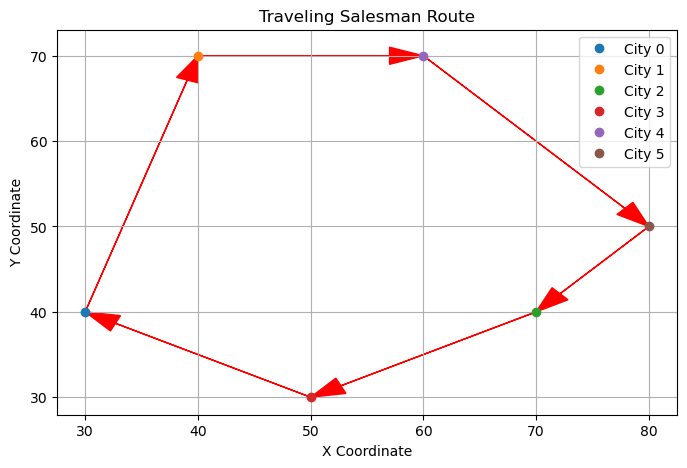

In [2]:
import numpy as np
import pulp
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

def solve_tsp_ilp(coordinates):
    # Calculate the distance matrix
    distance_matrix = cdist(coordinates, coordinates, metric='euclidean')

    # Number of cities
    num_cities = len(coordinates)

    # Create the problem variable to contain the problem data
    problem = pulp.LpProblem("TSP", pulp.LpMinimize)

    # Variables
    x = pulp.LpVariable.dicts("x", [(i, j) for i in range(num_cities) for j in range(num_cities)], cat=pulp.LpBinary)

    # Objective Function
    problem += pulp.lpSum([distance_matrix[i][j] * x[i, j] for i in range(num_cities) for j in range(num_cities)])

    # Constraints
    for i in range(num_cities):
        problem += pulp.lpSum([x[i, j] for j in range(num_cities) if i != j]) == 1
        problem += pulp.lpSum([x[j, i] for j in range(num_cities) if i != j]) == 1

    # Subtour elimination
    u = pulp.LpVariable.dicts("u", range(num_cities), lowBound=0, upBound=num_cities-1, cat=pulp.LpInteger)
    for i in range(1, num_cities):
        for j in range(1, num_cities):
            if i != j:
                problem += u[i] - u[j] + (num_cities * x[i, j]) <= num_cities - 1

    # Solve the problem
    problem.solve()

    # Extract the path from the solution
    route = []
    for i in range(num_cities):
        for j in range(num_cities):
            if x[i, j].value() == 1:
                route.append((i, j))

    return route

def plot_route(coordinates, route):
    # Plotting
    plt.figure(figsize=(8, 5))
    # Plot points
    for i, (x, y) in enumerate(coordinates):
        plt.plot(x, y, 'o', label=f'City {i}')

    # Draw lines for the route
    for i, j in route:
        start, end = coordinates[i], coordinates[j]
        plt.arrow(start[0], start[1], end[0] - start[0], end[1] - start[1], head_width=2, length_includes_head=True, color='r', linestyle='-', linewidth=1)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Traveling Salesman Route')
    plt.grid(True)
    plt.legend()
    plt.show()

# Coordinates array
coordinates = np.array([
    [30, 40],  # City 0
    [40, 70],  # City 1
    [70, 40],  # City 2
    [50, 30],  # City 3
    [60, 70],  # City 4
    [80, 50]   # City 5
])

# Solve TSP
route = solve_tsp_ilp(coordinates)
plot_route(coordinates, route)
